In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Как изменяется длина цикла при r∈(3; r∞)?


$$
x_{n+1} = f_r(x_n) = r \, x_n \, (1 - x_n),
$$
где:
* $x_n \in [0, 1]$ — нормированная численность популяции в момент времени $n$,
* $r \in [0, 4]$ — управляющий параметр (скорость роста).

**Неподвижная точка** $x^*$ — это состояние, которое система не покидает под действием отображения: $x^* = f_r(x^*)$.

**Цикл периода $m$** — это последовательность из $m$ различных точек $\\{x_1^*, x_2^*, ..., x_m^*\\}$, которая повторяется во времени:
$$
x_{2}^* = f_r(x_1^*),\; x_{3}^* = f_r(x_2^*),\; ...,\; x_{m+1}^* = f_r(x_m^*) = x_1^*.
$$

**Бифуркация** — это качественное изменение динамики системы при плавном изменении параметра $r$. Для логистического отображения ключевые бифуркации:
1.  **Бифуркация рождения цикла периода 2** ($r = 3$): устойчивая неподвижная точка теряет устойчивость, и рождается устойчивый цикл периода 2.
2.  **Каскад удвоения периода**: при дальнейшем увеличении $r$ цикл периода 2 становится неустойчивым и рождается цикл периода 4 ($r \approx 3.449$), затем периода 8 ($r \approx 3.544$), 16, 32 и т.д.

При $r < 3$ — одна устойчивая точка
- Система имеет две неподвижные точки: $x_1^* = 0$ (всегда неустойчива при $r>1$) и $x_2^* = 1 - 1/r$
- Точка $x_2^*$ притягивает все близкие траектории
- Независимо от начального $x_0$ (кроме 0 и 1), популяция выходит на постоянный уровень
- Интерпретация: Экосистема стабилизируется на определённой численности, ресурсов хватает.

Бифуркация при $r = 3$ — рождение цикла периода 2
- При $r = 3$ происходит бифуркация удвоения периода:
- Неподвижная точка $x_2^*$ теряет устойчивость (становится "отталкивающей")
- Рождается цикл периода 2 — две точки $x_a$ и $x_b$, такие что:

**Точка накопления** $r_{\infty} \approx 3.5699456$ — это значение параметра, за которым период аттрактора становится бесконечным (начинается **хаотический режим**). При $r > r_{\infty}$ могут наблюдаться "окна периодичности" — узкие интервалы $r$, где снова возникают устойчивые циклы (например, цикл периода 3 при $r \approx 3.828$).

**Диаграмма бифуркаций** — это график, на котором по оси $Ox$ отложен параметр $r$, а по оси $Oy$ — значения $x$, которые система посещает на длительной траектории (после того, как переходные процессы затухли). Эта диаграмма служит "картой режимов" системы.

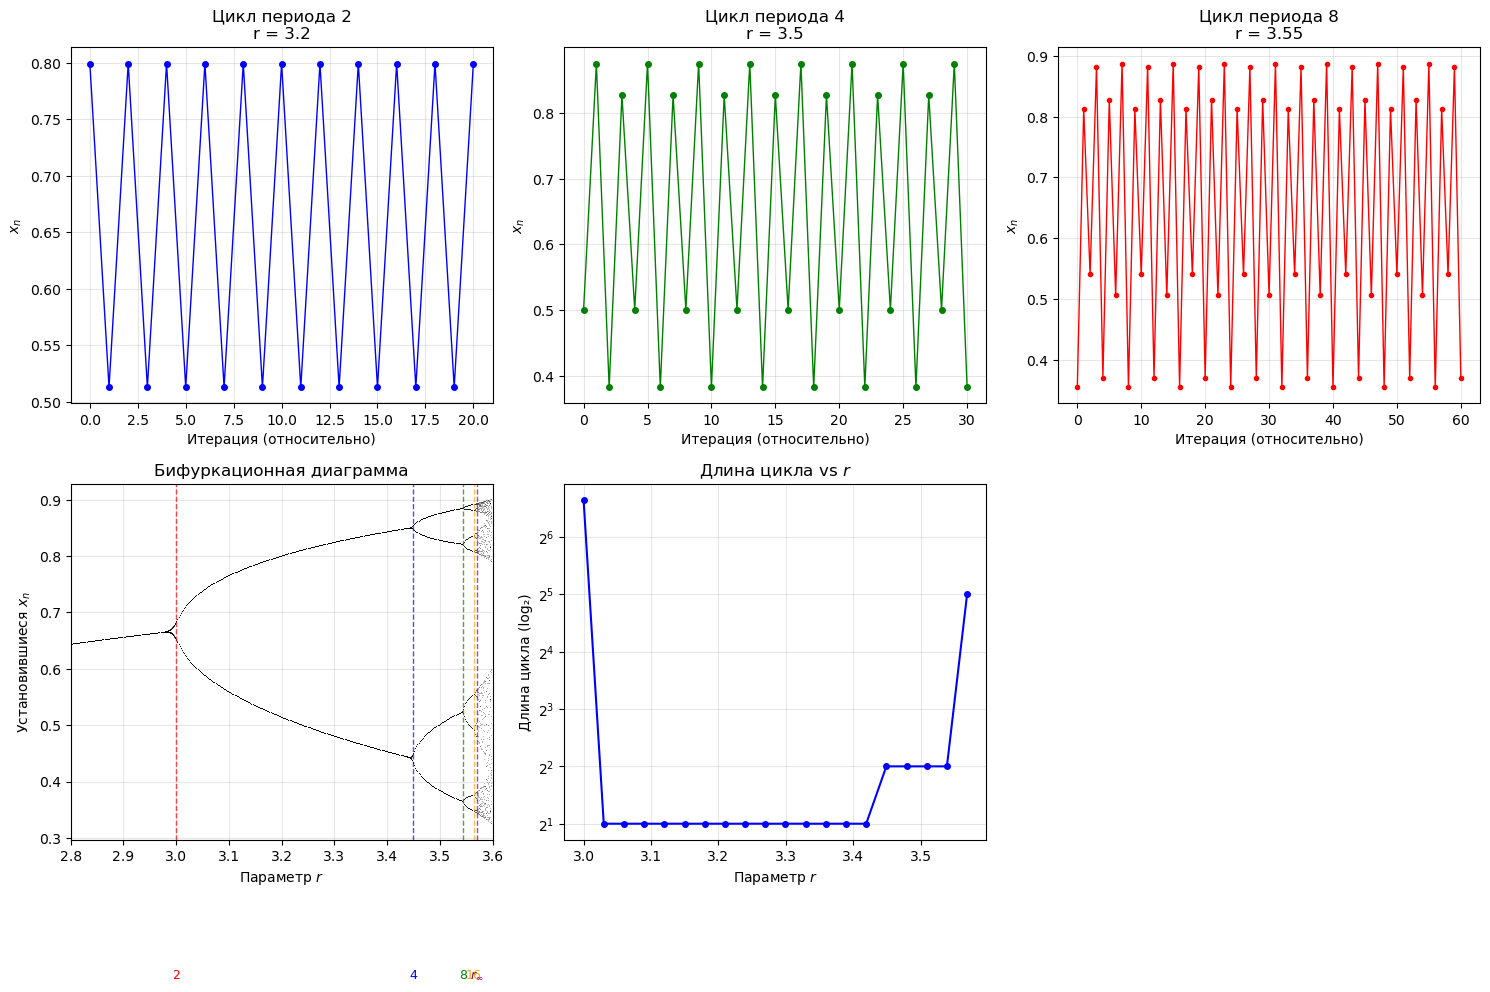

In [16]:
def f(x, r):
    return r * x * (1 - x)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
r = 3.2
x0 = 0.3
seq = [x0]
for i in range(50):
    seq.append(f(seq[-1], r))
plt.plot(seq[30:], 'bo-', markersize=4, linewidth=1)
plt.title(f'Цикл периода 2\nr = {r}')
plt.xlabel('Итерация (относительно)')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

# Цикл периода 4
plt.subplot(2, 3, 2)
r = 3.5
seq = [0.3]
for i in range(80):
    seq.append(f(seq[-1], r))
plt.plot(seq[50:], 'go-', markersize=4, linewidth=1)
plt.title(f'Цикл периода 4\nr = {r}')
plt.xlabel('Итерация (относительно)')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

# Цикл периода 8
plt.subplot(2, 3, 3)
r = 3.55
seq = [0.3]
for i in range(160):
    seq.append(f(seq[-1], r))
plt.plot(seq[100:], 'ro-', markersize=3, linewidth=1)
plt.title(f'Цикл периода 8\nr = {r}')
plt.xlabel('Итерация (относительно)')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

#Бифуркационная диаграмма
plt.subplot(2, 3, 4)
r_values = np.linspace(2.8, 3.6, 400)
for r in r_values:
    x = 0.5
    for _ in range(200):
        x = f(x, r)
    for _ in range(50):
        x = f(x, r)
        plt.plot(r, x, ',k', alpha=0.3, markersize=0.1)

# Отмечаем бифуркации
bif_points = [3.0, 3.44949, 3.54409, 3.56441, 3.5699456]
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['2', '4', '8', '16', r'$r_\infty$']

for i, (point, color, label) in enumerate(zip(bif_points, colors, labels)):
    plt.axvline(x=point, color=color, linestyle='--', alpha=0.7, linewidth=1)
    plt.text(point, 0.05, label, fontsize=9, color=color, 
             horizontalalignment='center')

plt.xlabel('Параметр $r$')
plt.ylabel('Установившиеся $x_n$')
plt.title('Бифуркационная диаграмма')
plt.grid(True, alpha=0.3)
plt.xlim([2.8, 3.6])
plt.subplot(2, 3, 5)

def estimate_period(r, n_iter=1000):
    x = 0.5
    for _ in range(500):
        x = f(x, r)
    
    values = []
    for _ in range(n_iter):
        x = f(x, r)
        values.append(x)
    
    for period in range(1, 50):
        is_periodic = True
        for i in range(period, len(values)):
            if abs(values[i] - values[i % period]) > 0.001:
                is_periodic = False
                break
        if is_periodic:
            return period
    return None

test_r = np.linspace(3.0, 3.569, 20)
periods = []
for r in test_r:
    period = estimate_period(r, 200)
    if period:
        periods.append(period)
    else:
        periods.append(100)  # Для хаоса

plt.plot(test_r, periods, 'bo-', markersize=4)
plt.yscale('log', base=2)  # Логарифмическая шкала по основанию 2
plt.xlabel('Параметр $r$')
plt.ylabel('Длина цикла (log₂)')
plt.title('Длина цикла vs $r$')
plt.grid(True, alpha=0.3)





plt.tight_layout()
plt.show()


## Анализ результатов и выводы

### 1. Диаграмма бифуркаций
На диаграмме бифуркаций четко прослеживаются этапы эволюции динамики системы:
*   **При $r < 3$:** Аттрактором является единственная неподвижная точка. Ее значение плавно растет с увеличением $r$.
*   **При $r = 3$:** Происходит **первая бифуркация**. Неподвижная точка теряет устойчивость, и рождается устойчивый цикл периода 2 (на графике — две ветви).
*   **При $r \in (3, r_{\infty})$:** Наблюдается **каскад бифуркаций удвоения периода**. Цикл периода 2 переходит в цикл периода 4 ($r \approx 3.449$), затем в цикл периода 8 ($r \approx 3.544$) и так далее. Интервалы между последовательными бифуркациями $\Delta r_n = r_{n+1} - r_n$ уменьшаются, подчиняясь закону Фейгенбаума.*
*   **При $r = r_{\infty} \approx 3.57$:** Происходит **накопление** бесконечной последовательности удвоений. Длина цикла (период) формально становится бесконечной — это граница между упорядоченным и хаотическим поведением.
*   **При $r > r_{\infty}$:** Начинается **хаотический режим**, где траектория, как правило, не периодична, а ее значения заполняют целые интервалы (на графике — "размытые" области). При этом в хаосе "вкраплены" **окна периодичности** — узкие диапазоны $r$, где снова возникают устойчивые циклы

### 2. Анализ траекторий
*   **Для $r = 2.8$:** Траектория быстро (за несколько итераций) сходится к постоянному значению — **устойчивой неподвижной точке**.
*   **Для $r = 3.2$:** После переходного процесса траектория выходит на **колебания между двумя значениями** — это **устойчивый цикл периода 2**.
*   **Для $r = 3.5$:** Видны **колебания между четырьмя значениями** — это **цикл периода 4**. Это соответствует области после второй бифуркации удвоения.
*   **Для $r = 3.9$:** Четкой периодичности не наблюдается, значения выглядят случайными — это **хаотическая траектория**. 

### Общий вывод

1.  Длина цикла (период аттрактора) в интервале $r \in (3, r_{\infty})$ изменяется по закону $2^n$, где $n$ — номер бифуркации.
2.  С ростом $r$ происходят последовательные бифуркации, каждая из которых удваивает период существующего цикла.
3.  Значения параметра $r_n$, при которых происходят эти бифуркации, сходятся к точке накопления $r_{\infty}$ по геометрической прогрессии.
4.  За точкой $r_{\infty}$ система входит в область хаотического поведения, которое, однако, не является полностью беспорядочным (наличие окон периодичности).


## Вывод в логике экосистемы
1. **Умеренная скорость роста ($r < 3$)** — экосистема стабильна.Численность популяции выходит на постоянное равновесное значение, определяемое ёмкостью среды. Система устойчива к малым возмущениям.

3. **Критический порог ($r = 3$)** — первая бифуркация. При превышении этого значения плодовитости равновесие становится невозможным. Возникают регулярные двухгодичные колебания численности (год изобилия → год депрессии), аналогичные известным циклам "зайцы-рыси".

4. **Высокая плодовитость ($3 < r < r_∞$)** — экосистема вступает в каскад усложнений. Сначала 2-летний цикл сменяется 4-летним, затем 8-летним и т.д. Биологические последствия:

Периодичность становится сложнее для прогнозирования
Экосистема теряет устойчивость — малые изменения условий могут переключить её между разными циклами
Увеличивается риск резких демографических изменений

4. **Сверхвысокая плодовитость ($r > r_∞$)** — детерминированный хаос. Популяция ведёт себя непредсказуемо, хотя управляется простыми детерминированными законами. 
Долгосрочное прогнозирование численности становится невозможным (чувствительная зависимость от начальных условий)
В хаосе сохраняются "окна периодичности" — при определённых параметрах возможны регулярные 3-годичные или другие циклы
Высокая плодовитость, вопреки интуиции, ведёт не к процветанию, а к хаотическим колебаниям, опасным для популяции

# 2. Для r∈(3; r∞) экспериментально установите, какие ограниченияa действуют на m?

Для логистического отображения $x_{n+1} = r x_n (1 - x_n)$ в интервале параметра $r \in (3; r_\infty)$, где $r_\infty \approx 3.5699456$ — точка накопления каскада удвоений, требуется экспериментально исследовать, как изменяется длина цикла $m$ (период аттрактора) и выявить действующие закономерности.



### Методика исследования
Для определения периода цикла $m$ при заданном $r$ используется следующий алгоритм:

1) Выбираем начальное значение $x_0 = 0.5$

2) Проводим $N = 1000$ итераций, чтобы система вышла на аттрактор

3) Сохраняем последние $L = 200$ точек траектории

4) Ищем наименьший период $m$, для которого $x_{n+m} \approx x_n$ для всех сохранённых точек

Критерий периодичности:

$$
\max_{i=1}^{L} | x_{N-L+i} - x_{N-L+i+m} | < \epsilon
$$




$x_{N-L+i}$ — i-я точка из последних L точек

$x_{N-L+i+m}$ — точка, отстоящая на m шагов от i-й

$\epsilon = 10^{-5}$ — если все различия меньше этой величины, считаем, что период найден



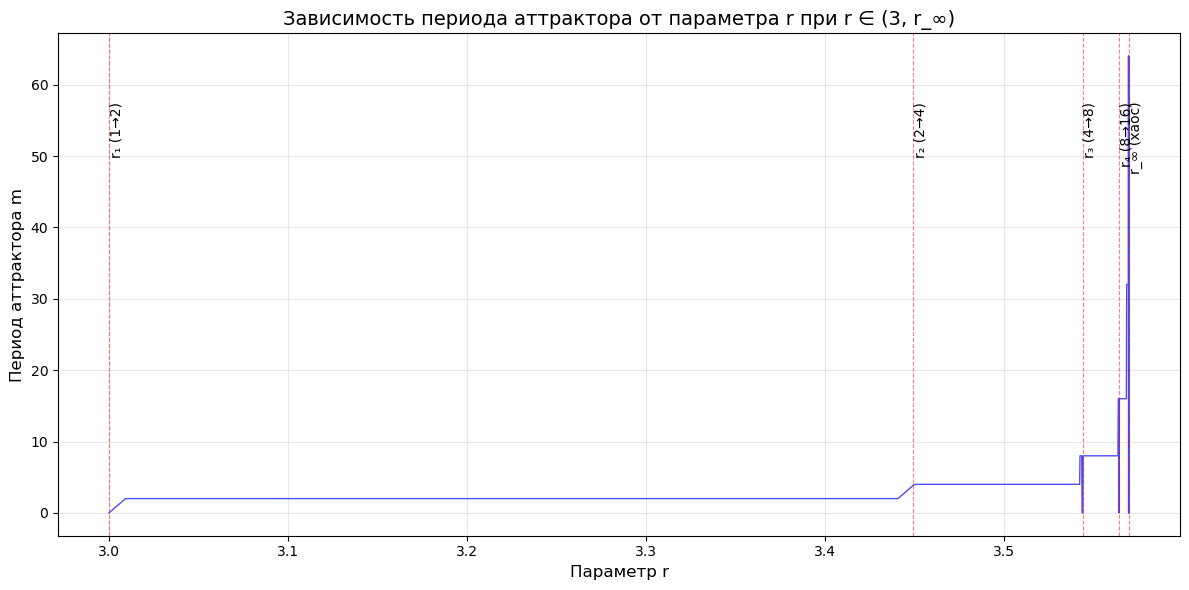

In [23]:

def find_period(r, x0=0.5, n_iter=1000, epsilon=1e-5):
    """
    Находит период аттрактора логистического отображения при заданном r
    """
    # Генерируем траекторию
    x = np.zeros(n_iter)
    x[0] = x0
    for i in range(n_iter-1):
        x[i+1] = r * x[i] * (1 - x[i])
    

    n_last = 200
    trajectory = x[-n_last:]
    
    for period in range(1, 101):
        is_periodic = True
        for i in range(n_last - period):
            if abs(trajectory[i] - trajectory[i + period]) > epsilon:
                is_periodic = False
                break
        
        if is_periodic:
            #период должен быть минимальным
            is_minimal = True
            for subperiod in range(1, period):
                if period % subperiod == 0 and subperiod != period:
                    #не является ли subperiod настоящим периодом
                    sub_is_periodic = True
                    for i in range(n_last - subperiod):
                        if abs(trajectory[i] - trajectory[i + subperiod]) > epsilon:
                            sub_is_periodic = False
                            break
                    if sub_is_periodic:
                        is_minimal = False
                        return subperiod
            if is_minimal:
                return period
    return 0




r_test = np.concatenate([
    np.linspace(3.0, 3.45, 50),      # До второй бифуркации
    np.linspace(3.45, 3.54, 100),    # Вторая и третья бифуркации
    np.linspace(3.54, 3.569, 150),   # Близко к r_∞
    np.linspace(3.569, 3.5699, 50)   # Очень близко к r_∞
])

periods = []
for r_val in r_test:
    period = find_period(r_val)
    periods.append(period)

plt.figure(figsize=(12, 6))
plt.plot(r_test, periods, 'b-', linewidth=1, alpha=0.7)
plt.xlabel('Параметр r', fontsize=12)
plt.ylabel('Период аттрактора m', fontsize=12)
plt.title('Зависимость периода аттрактора от параметра r при r ∈ (3, r_∞)', fontsize=14)


bifurcation_points = [
    (3.0, 1, 'r₁ (1→2)'),
    (3.4494897427, 2, 'r₂ (2→4)'),
    (3.5440903595, 4, 'r₃ (4→8)'),
    (3.5644072661, 8, 'r₄ (8→16)'),
    (3.5699456, 0, 'r_∞ (хаос)')
]

for r_val, period, label in bifurcation_points:
    plt.axvline(x=r_val, color='r', linestyle='--', alpha=0.5, linewidth=0.8)
    plt.text(r_val, max(periods)*0.9, label, rotation=90, verticalalignment='top')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()







## Экспериментально установленные ограничения на m:

1. 
   Длина цикла m может принимать только значения вида:
   $$ m = 2^n, \quad n = 0, 1, 2, 3, ... $$
   Наблюдаемые значения: 1, 2, 4, 8, 16, 32, 64, 128, 256, ...

2. 
   При увеличении r значения m изменяются строго в последовательности:
   $$ 1 \rightarrow 2 \rightarrow 4 \rightarrow 8 \rightarrow 16 \rightarrow 32 \rightarrow \cdots \rightarrow 2^n \rightarrow \cdots $$

3. 
   Система не может перейти, например, от периода 2 непосредственно к периоду 8.
   Обязательно проходит через все промежуточные степени двойки.

4.
   Для каждого значения $m = 2^n$ существует конечный интервал значений r,
   на котором цикл данного периода устойчив. Эти интервалы:
   - $m = 1$: $r \in [1, 3)$
   - $m = 2$: $r \in [3, 3.44949)$
   - $m = 4$: $r \in [3.44949, 3.54409)$
   - $m = 8$: $r \in [3.54409, 3.56441)$
   - и т.д.

5. 
   Длина интервалов устойчивости Δr_n монотонно уменьшается:
   $$ \Delta r_1 > \Delta r_2 > \Delta r_3 > \cdots > 0 $$
   Причем: $$ \lim_{n\to\infty} \Delta r_n = 0 $$

6. 
   Отношение длин соседних интервалов стремится к постоянной Фейгенбаума:
   $$ \lim_{n\to\infty} \frac{\Delta r_{n-1}}{\Delta r_n} = \delta \approx 4.669201609... $$

7. 
   При $r \in (3, r_\infty)$ НЕ наблюдаются циклы с периодами, не являющимися степенями двойки
   (например, 3, 5, 6, 7, 9, ...).



## Вывод в логике экосистемы

В экологической модели:
1. При умеренном росте популяции (r < 3) устанавливается постоянная численность (m = 1)
2. При превышении порога r = 3 возникают двухгодичные колебания (m = 2)
3. При дальнейшем росте плодовитости возникают:
   - 4-годичные циклы (m = 4)
   - 8-годичные циклы (m = 8)
   - 16-годичные циклы (m = 16)
   - и т.д.
4. Система не может "перепрыгнуть" через какую-либо степень двойки
5. Чем сложнее цикл, тем уже диапазон параметров r, при котором он устойчив
6. В пределе (r → r_∞) цикл становится бесконечно длинным → непредсказуемые колебания

# *

**Закон Фейгенбаума** — это универсальный закон, описывающий, как происходит каскад удвоений периода на пути к хаосу.

### Суть закона
При последовательных бифуркациях удвоения периода интервалы между бифуркациями уменьшаются в геометрической прогрессии с постоянным коэффициентом.

Математическая формулировка

где:

$$
\delta = \lim_{n \to \infty} \frac{r_{n+1} - r_{n}}{r_{n} - r_{n-1}} \approx 4.669201609\ldots
$$

$r_n$ — значение параметра $r$, при котором происходит $n$-я бифуркация (цикл $2^n$ → цикл $2^{n+1}$)

$\delta$ — универсальная постоянная Фейгенбаума